# Introducción

Este notebook está destinado a repasar algunos ejemplos del libro del Profesor Morán de la asignatura Investigación Operativa I de la FCEIA-UNR

# Librerías

In [ ]:
import pandas as pd
from ortools.linear_solver import pywraplp

# Capítulo 1

## Ejemplo 1-1

El siguiente ejemplo se enuncia a continuación:



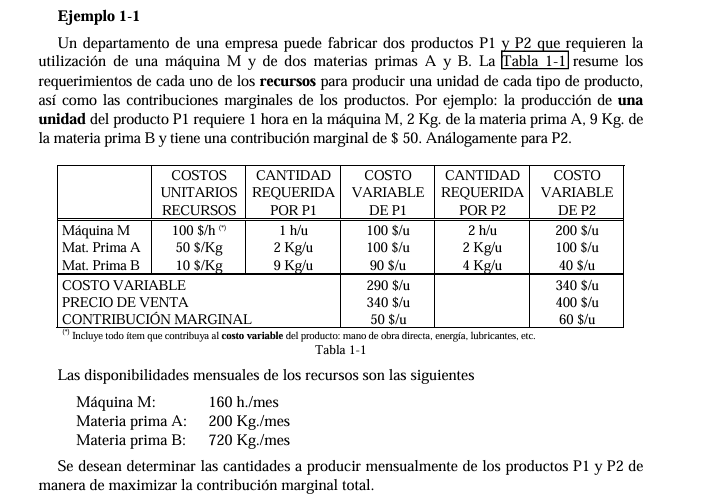

Llamemos:
-   Q1: cantidad de producto 1
-   Q2: cantidad de producto 2
-   CM1: contribución marginal del producto 1 = 50 $/u
-   CM2: contribución marginal del producto 2 = 60 $/u

Es claro que lo que se quiere maximizar es la suma:

$Q1 * CM1 + Q2 * CM2$

Por otro lado tenemos las restricciones:

$Q1 * 1 + Q2 * 2 <= 160$ -> Restricción de uso de máquina

$Q1 * 2 + Q2 * 2 <= 200$ -> Restricción de Materia prima A

$Q1 * 9 + Q2 * 4 <= 720$ -> Restricción de Materia prima B

$Q1, Q2 >= 0$ -> Restricción de no negatividad de cantidad, particularmente, ambos valores son **enteros** no negativos

Con todo esto, ya podemos pasar a nuestro código

In [ ]:
# Definimos el modelo
# Usamos 'SAT' (CP-SAT) porque estamos usando tadas variables enteras y así lo recomienda el manual del solver. Si no fuese el caso, cambiar por SCIP
modelo = pywraplp.Solver.CreateSolver('SAT')

# Definimos infinity (infinito)
infinity = modelo.infinity()

# Q1 y Q2 con variables enteras no negativas
Q1 = modelo.IntVar(0, infinity, "Q1")
Q2 = modelo.IntVar(0, infinity, "Q2")

# Definimos la función objetivo
obj_expr = Q1 * 50 + Q2 * 60

#Restricciones:

#1

modelo.Add(Q1 * 1 + Q2 * 2 <= 160)

#2

modelo.Add(Q1 * 2 + Q2 * 2 <= 200)

#3

modelo.Add(Q1 * 9 + Q2 * 4 <= 720)


# Solver
modelo.Maximize(obj_expr)

In [22]:
# Llamamos al solver
status = modelo.Solve()

# Si alcanza el óptimo nos muestra la solución, si no es así, nos lo menciona
if status == pywraplp.Solver.OPTIMAL:
    print("Solución:")
    print("Función objetivo =", modelo.Objective().Value())
    print("Q1 =", Q1.solution_value())
    print("Q2 =", Q2.solution_value())
else:
    print("No se ha alcanzado el óptimo.")

Solución:
Función objetivo = 5600.0
Q1 = 40.0
Q2 = 60.0


Para este caso la solución es sencilla y no requiere mayores parametrizaciones. Para casos más complejos el solver puede necesitar parametros adicionales.

## Práctica 1 - Ej. 1

El siguiente ejercicio se enuncia a continuación:


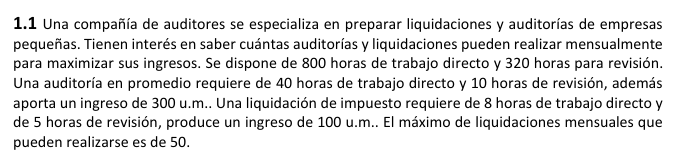

Llamemos:
-   QA: cantidad de auditorías
-   QL: cantidad de Liquidaciones
-   IA: Ingreso por auditoría = 300 $/u
-   IL: Ingreso por liquidación = 100 $/u

Con esto, se busca maximizar

$QA * IA + QL * IL$

restricciones:

$QA * 40 + QL * 8 <= 800$ -> Restricción de horas de trabajo directo

$QA * 10 + QL * 5 <= 320$ -> Restricción de horas de revisión

$QL <= 50$ -> Restricción de cantidad máxima de liquidaciones

$QA, QL >= 0$ -> Restricción de no negatividad de cantidad, particularmente, ambos valores son **enteros** no negativos

In [ ]:
# Definimos el modelo
modelo = pywraplp.Solver.CreateSolver('SAT')

# Definimos infinity (infinito)
infinity = modelo.infinity()

# QA y QL con variables enteras no negativas
QA = modelo.IntVar(0, infinity, "QA")
QL = modelo.IntVar(0, 50, "QL")

# Definimos la función objetivo
obj_expr = QA * 300 + QL * 100

#Restricciones:

#1

modelo.Add(QA * 40 + QL * 8 <= 800)

#2

modelo.Add(QA * 10 + QL * 5 <= 320)

#3
# No es necesario definir restricción de cantidad máxima ya queda definido en la definición de QL, en caso de querer agregarlo sería:
# modelo.Add(QL <= 50)


# Solver
modelo.Maximize(obj_expr)

In [38]:
# Llamamos al solver
status = modelo.Solve()

# Si alcanza el óptimo nos muestra la solución, si no es así, nos lo menciona
if status == pywraplp.Solver.OPTIMAL:
    print("Solución:")
    print("Función objetivo =", modelo.Objective().Value())
    print("QA =", QA.solution_value())
    print("QL =", QL.solution_value())
else:
    print("No se ha alcanzado el óptimo.")

Solución:
Función objetivo = 7600.0
QA = 12.0
QL = 40.0
